#### Learning Objectives
By the end of this lesson, you will be able to use regularization to reduce overfitting.

## Regularization

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics

In [2]:
# Load mammals data set
mammals_path = os.path.join('..', 'data', 'mammals.txt')
cols = ['brain', 'body']
mammals = pd.read_csv(mammals_path, sep='\t', names=cols, header=0)
mammals = mammals.loc[mammals.loc[:, 'body'] < 200, :].sort_values('body')

<a id="bonus-material-regularization"></a>
### Why Regularize?

Recall this overly complicated model:

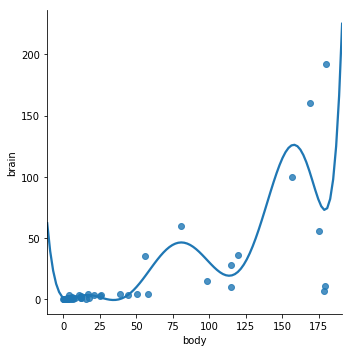

In [3]:
# Too many polynomial terms leads to overfitting
fig = sns.lmplot(x='body', y='brain', data=mammals, ci=None, order=8);

One way to make this model behave in a more reasonable way is to reduce the number of features we give it.

Another way is to *make it pay to use those features*. This approach is called **regularization**.

<a id="how-does-regularization-work"></a>
### How Does Regularization Work?

For a normal linear regression model, we estimate the coefficients using the least squares criterion, which minimizes the mean square error (MSE).

For a regularized linear regression model, we minimize the sum of MSE and a "penalty term" that penalizes coefficient size.

**Ridge regression** (or "L2 regularization") minimizes: $$\text{MSE} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\text{MSE} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the number of features.
- $\beta_j$ is a model coefficient.
- $\alpha$ is a tuning parameter:
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.

<a id="lasso-and-ridge-path-diagrams"></a>
### Lasso and Ridge Path Diagrams

A larger alpha (toward the left of each diagram) results in more regularization:

- Lasso regression shrinks coefficients all the way to zero, thus removing them from the model.
- Ridge regression shrinks coefficients toward zero, but they essentially never reach zero.

Source code for the diagrams: [Lasso regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html) and [Ridge regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

![Lasso and Ridge Coefficient Plots](../assets/lasso_ridge_path.png)

<a id="advice-for-applying-regularization"></a>
### Advice for Applying Regularization

**Features should be standardized** so that the penalty is not sensitive to the scale of the variables.

**How should you choose between lasso regression and ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- Ridge can work particularly well if there is a high degree of colinearity in your model.
- If model performance is your primary concern, it is best to try both.
- Elastic net regression is a combination of lasso regression and ridge regression.

<a id="ridge-regression"></a>
### Example

- [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation
- **alpha:** must be positive, increase for more regularization
- **normalize:** scales the features (without using StandardScaler)

In [4]:
bikes_path = os.path.join('..', 'data', 'bikeshare.csv')
bikes = pd.read_csv(bikes_path, index_col='datetime', parse_dates=True)
bikes_dummies = pd.get_dummies(bikes, columns=['season']).drop('season_1', axis=1)

In [5]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes_dummies.loc[:, feature_cols]
y = bikes_dummies.loc[:, 'count']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Fit a Ridge Regression model with alpha=0 (equivalent to linear regression)
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0, normalize=True)

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

156.71762172901268


In [8]:
# Coefficients for a non-regularized linear regression
list(zip(feature_cols, ridgereg.coef_))

[('temp', 9.586495874322862),
 ('season_2', -1.2531339274580644),
 ('season_3', -44.35253424400129),
 ('season_4', 54.60494849879624),
 ('humidity', -2.8510687096876874)]

Be careful in interpreting these coefficients, because they are related to the *normalized* versions of the input variables.

In [9]:
# Try alpha=0.1.
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

157.38104153413863


In [10]:
# Examine the coefficients.
list(zip(feature_cols, ridgereg.coef_))

[('temp', 7.8017452494717),
 ('season_2', 13.21508363621035),
 ('season_3', -14.255958667738152),
 ('season_4', 55.080108338483754),
 ('humidity', -2.6530211673636646)]

Notice that the model tries to spread the coefficients more evenly because the squared term particularly punishes large deviations from zero.

In [11]:
# Try Lasso with alpha=0.1
from sklearn.linear_model import Lasso

ridgereg = Lasso(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

159.40030792786033


In [12]:
# Examine the coefficients.
list(zip(feature_cols, ridgereg.coef_))

[('temp', 6.737696337436866),
 ('season_2', 0.0),
 ('season_3', -0.0),
 ('season_4', 27.762312991063485),
 ('humidity', -2.290981650895824)]

# Questions?

# [Exit Tickets](https://docs.google.com/forms/d/1BW4rVsCx8Nzp3q2B7SQ_tL1xqKZr4GGoQ5qeZfayxh4/viewform?ts=5ad40144&edit_requested=true)